In [1]:
import pandas as pd
import numpy as np
import re
from subprocess import Popen
from os.path import isfile
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.SeqFeature import SeqFeature, FeatureLocation
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [2]:
df = pd.read_csv('eps_operon_full.csv',index_col=0,header=0)

In [3]:
df.head()

,sacc,qseqid,sseqid,evalue,bitscore,qgi,sgi,staxids,sscinames,scomnames,stitle,genus,superfamily,family,order,phylum,class,query_info
0,WP_086914179,WP_087496569,WP_086914179.1_GCF_002157165.1_ASM215716v1,2.220000e-150,432.0,0,0,553814,Acidovorax carolinensis,Acidovorax carolinensis,polyprenyl synthetase family protein [Acidovor...,Acidovorax,unknown,Comamonadaceae,Burkholderiales,Proteobacteria,Betaproteobacteria,polyprenyl synthetase family protein
1,WP_187305962,WP_087496569,WP_187305962.1_GCF_002214645.1_ASM221464v1,1.310000e-143,416.0,0,0,1546149,Diaphorobacter polyhydroxybutyrativorans,Diaphorobacter polyhydroxybutyrativorans,polyprenyl synthetase family protein [Diaphoro...,Diaphorobacter,unknown,Comamonadaceae,Burkholderiales,Proteobacteria,Betaproteobacteria,polyprenyl synthetase family protein
2,WP_036939373,WP_087496569,WP_036939373.1_GCF_003812525.1_ASM381252v1,3.440000e-105,318.0,0,0,585,Proteus vulgaris,Proteus vulgaris,MULTISPECIES: octaprenyl diphosphate synthase ...,Proteus,unknown,Morganellaceae,Enterobacterales,Proteobacteria,Gammaproteobacteria,polyprenyl synthetase family protein
3,WP_128113047,WP_087496569,WP_128113047.1_GCF_900096755.1_Fsp1.4,1.040000e-109,330.0,0,0,576610,Polynucleobacter necessarius,Polynucleobacter necessarius,polyprenyl synthetase family protein [Polynucl...,Polynucleobacter,unknown,Burkholderiaceae,Burkholderiales,Proteobacteria,Betaproteobacteria,polyprenyl synthetase family protein
4,WP_201348422,WP_087496569,WP_201348422.1_GCF_016592555.1_ASM1659255v1,1.970000e-106,322.0,0,0,1441457,Neptunomonas japonica JAMM 1380,Neptunomonas japonica JAMM 1380,octaprenyl diphosphate synthase [Neptunomonas ...,Neptunomonas,unknown,Oceanospirillaceae,Oceanospirillales,Proteobacteria,Gammaproteobacteria,polyprenyl synthetase family protein


In [4]:
def get_assembly(line):
    gcf_regex = re.compile("GCF_[0-9]*\.[0-9]")
    res = re.search(gcf_regex,line)
    return res.group()

In [5]:
df['assembly'] = df['sseqid'].apply(lambda line: get_assembly(line))

In [6]:
df.head()

,sacc,qseqid,sseqid,evalue,bitscore,qgi,sgi,staxids,sscinames,scomnames,stitle,genus,superfamily,family,order,phylum,class,query_info,assembly
0,WP_086914179,WP_087496569,WP_086914179.1_GCF_002157165.1_ASM215716v1,2.220000e-150,432.0,0,0,553814,Acidovorax carolinensis,Acidovorax carolinensis,polyprenyl synthetase family protein [Acidovor...,Acidovorax,unknown,Comamonadaceae,Burkholderiales,Proteobacteria,Betaproteobacteria,polyprenyl synthetase family protein,GCF_002157165.1
1,WP_187305962,WP_087496569,WP_187305962.1_GCF_002214645.1_ASM221464v1,1.310000e-143,416.0,0,0,1546149,Diaphorobacter polyhydroxybutyrativorans,Diaphorobacter polyhydroxybutyrativorans,polyprenyl synthetase family protein [Diaphoro...,Diaphorobacter,unknown,Comamonadaceae,Burkholderiales,Proteobacteria,Betaproteobacteria,polyprenyl synthetase family protein,GCF_002214645.1
2,WP_036939373,WP_087496569,WP_036939373.1_GCF_003812525.1_ASM381252v1,3.440000e-105,318.0,0,0,585,Proteus vulgaris,Proteus vulgaris,MULTISPECIES: octaprenyl diphosphate synthase ...,Proteus,unknown,Morganellaceae,Enterobacterales,Proteobacteria,Gammaproteobacteria,polyprenyl synthetase family protein,GCF_003812525.1
3,WP_128113047,WP_087496569,WP_128113047.1_GCF_900096755.1_Fsp1.4,1.040000e-109,330.0,0,0,576610,Polynucleobacter necessarius,Polynucleobacter necessarius,polyprenyl synthetase family protein [Polynucl...,Polynucleobacter,unknown,Burkholderiaceae,Burkholderiales,Proteobacteria,Betaproteobacteria,polyprenyl synthetase family protein,GCF_900096755.1
4,WP_201348422,WP_087496569,WP_201348422.1_GCF_016592555.1_ASM1659255v1,1.970000e-106,322.0,0,0,1441457,Neptunomonas japonica JAMM 1380,Neptunomonas japonica JAMM 1380,octaprenyl diphosphate synthase [Neptunomonas ...,Neptunomonas,unknown,Oceanospirillaceae,Oceanospirillales,Proteobacteria,Gammaproteobacteria,polyprenyl synthetase family protein,GCF_016592555.1


# parsing result dataframe

In [7]:
#divide the result dataframe into subframes with query ids
eps_operon_important_genes = ['WP_087496534',
 'WP_087496535',
 'WP_087496536',
 'WP_087496537',
 'WP_087496538',
 'WP_198301847',
 'WP_198301974',
 'WP_087496542',
 'WP_157673201',
 'WP_087496544',
 'WP_087496545',
 'WP_087496546',
 'WP_087496547',
 'WP_087496548',
 'WP_157673202',
 'WP_087496550',
 'WP_087496551',
 'WP_087496552',
 'WP_087496553',
 'WP_087496554',
 'WP_087496555',
 'WP_087496556',
 'WP_087496557',
 'WP_087496558',
 'WP_087496559',
 'WP_087496560',
 'WP_087496561',
 'WP_087496562',
 'WP_087496563',
 'WP_087496564']

dataframes = []
for qseq in eps_operon_important_genes:
    if qseq in list(df['qseqid'].unique()):
        dataframes.append(df[df['qseqid'] == qseq].copy())
    else:
        print("[-] {} not in result dataframe ...".format(qseq))

df = pd.concat(dataframes)
print("[*] amount dataframes : {}".format(len(dataframes)))

[-] WP_087496538 not in result dataframe ...
[-] WP_157673201 not in result dataframe ...
[*] amount dataframes : 28


In [8]:
full_operon_hits = {}
count = 1
for dataf in dataframes:
    #print("[*] Parsing pandas dataframe : {}".format(count))
    for assembly in list(dataf['assembly'].unique()):
        if assembly not in full_operon_hits.keys():
            full_operon_hits[assembly] = 1
            continue
        else:
            full_operon_hits[assembly] += 1
            continue
    #print('[+] Done parsing df : {}'.format(count))
    count += 1

In [9]:
target_assemblies = []
for hit in full_operon_hits.keys():
    if full_operon_hits[hit] >= 21:
        target_assemblies.append(hit)
        print("[+] found : {}".format(hit))

[+] found : GCF_002163715.1
[+] found : GCF_003955735.1
[+] found : GCF_009906855.1
[+] found : GCF_000619905.2
[+] found : GCF_001653795.1


In [10]:
result_dataframes = []
for hit in target_assemblies:
    result_dataframes.append(df[df['assembly'] == hit])

In [11]:
result_df = pd.concat(result_dataframes)

In [12]:
result_df.head()

,sacc,qseqid,sseqid,evalue,bitscore,qgi,sgi,staxids,sscinames,scomnames,stitle,genus,superfamily,family,order,phylum,class,query_info,assembly
32566,WP_087496534,WP_087496534,WP_087496534.1_GCF_002163715.1_ASM216371v1,2.900000e-132,376.0,0,0,1844971,Curvibacter sp. AEP1-3,Curvibacter sp. AEP1-3,"dTDP-4-dehydrorhamnose 3,5-epimerase [Curvibac...",Curvibacter,unknown,Comamonadaceae,Burkholderiales,Proteobacteria,Betaproteobacteria,"dTDP-4-dehydrorhamnose 3,5-epimerase [Curvibac...",GCF_002163715.1
29517,WP_087496535,WP_087496535,WP_087496535.1_GCF_002163715.1_ASM216371v1,0.000000e+00,617.0,0,0,1844971,Curvibacter sp. AEP1-3,Curvibacter sp. AEP1-3,glucose-1-phosphate thymidylyltransferase RfbA...,Curvibacter,unknown,Comamonadaceae,Burkholderiales,Proteobacteria,Betaproteobacteria,glucose-1-phosphate thymidylyltransferase RfbA...,GCF_002163715.1
18876,WP_087496536,WP_087496536,WP_087496536.1_GCF_002163715.1_ASM216371v1,0.000000e+00,615.0,0,0,1844971,Curvibacter sp. AEP1-3,Curvibacter sp. AEP1-3,dTDP-4-dehydrorhamnose reductase [Curvibacter ...,Curvibacter,unknown,Comamonadaceae,Burkholderiales,Proteobacteria,Betaproteobacteria,dTDP-4-dehydrorhamnose reductase [Curvibacter ...,GCF_002163715.1
1289,WP_087496537,WP_087496537,WP_087496537.1_GCF_002163715.1_ASM216371v1,0.000000e+00,745.0,0,0,1844971,Curvibacter sp. AEP1-3,Curvibacter sp. AEP1-3,"dTDP-glucose 4,6-dehydratase [Curvibacter sp. ...",Curvibacter,unknown,Comamonadaceae,Burkholderiales,Proteobacteria,Betaproteobacteria,"dTDP-glucose 4,6-dehydratase [Curvibacter sp. ...",GCF_002163715.1
63763,WP_198301847,WP_198301847,WP_198301847.1_GCF_002163715.1_ASM216371v1,1.200000e-105,307.0,0,0,1844971,Curvibacter sp. AEP1-3,Curvibacter sp. AEP1-3,PEP-CTERM sorting domain-containing protein [C...,Curvibacter,unknown,Comamonadaceae,Burkholderiales,Proteobacteria,Betaproteobacteria,FxDxF family PEP-CTERM protein [Curvibacter sp...,GCF_002163715.1


In [13]:
result_df['sscinames'].unique()

array(['Curvibacter sp. AEP1-3', 'Undibacterium parvum',
       'Xylophilus rhododendri', 'Nitrosospira briensis C-128',
       'Mitsuaria sp. 7'], dtype=object)

In [14]:
len(result_df)

152

# downloading genbank files

In [15]:
refseq_table = pd.read_table('../refseq_summary/assembly_summary_refseq.txt', skiprows=[0, 1], header=None, usecols=range(22))
header = ["assembly_accession", "bioproject", "biosample", "wgs_master", "refseq_category", "taxid",
          "species_taxid", "organism_name", "infraspecific_name", "isolate", "version_status", "assembly_level",
          "release_type", "genome_rep", "seq_rel_date", "asm_name", "submitter", "gbrs_paired_asm",
          "paired_asm_comp", "ftp_path", "excluded_from_refseq", "relation_to_type_material"]
refseq_table.columns = header

In [16]:
assemblies = list(result_df['assembly'].unique())

In [17]:
assemblies

['GCF_002163715.1',
 'GCF_003955735.1',
 'GCF_009906855.1',
 'GCF_000619905.2',
 'GCF_001653795.1']

In [18]:
target_refseq_assemblies = []
for assembly_acc in assemblies:
    target_refseq_assemblies.append(refseq_table[refseq_table['assembly_accession'] == assembly_acc])
assemblies_pd = pd.concat(target_refseq_assemblies)

In [19]:
assemblies_pd.head()

,assembly_accession,bioproject,biosample,wgs_master,refseq_category,taxid,species_taxid,organism_name,infraspecific_name,isolate,...,release_type,genome_rep,seq_rel_date,asm_name,submitter,gbrs_paired_asm,paired_asm_comp,ftp_path,excluded_from_refseq,relation_to_type_material
81679,GCF_002163715.1,PRJNA224116,SAMN04943348,NaN,na,1844971,1844971,Curvibacter sp. AEP1-3,strain=AEP1-3,NaN,...,Major,Full,2017/06/02,ASM216371v1,The Australian National University,GCA_002163715.1,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002...,NaN,NaN
123415,GCF_003955735.1,PRJNA224116,SAMN10578767,NaN,representative genome,401471,401471,Undibacterium parvum,strain=DSM 23061,NaN,...,Major,Full,2018/12/19,ASM395573v1,KyungHee University,GCA_003955735.1,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/003...,NaN,assembly from type material
156191,GCF_009906855.1,PRJNA224116,SAMN13783577,NaN,representative genome,2697032,2697032,Xylophilus rhododendri,strain=KACC 21265,NaN,...,Major,Full,2020/01/20,ASM990685v1,National Institute of Agricultural Sciences,GCA_009906855.1,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/009...,NaN,assembly from type material
19859,GCF_000619905.2,PRJNA224116,SAMN02744081,NaN,representative genome,1266925,35799,Nitrosospira briensis C-128,strain=C-128,NaN,...,Major,Full,2015/08/14,ASM61990v2,DOE Joint Genome Institute,GCA_000619905.2,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,NaN,assembly designated as reftype
62773,GCF_001653795.1,PRJNA224116,SAMN03704891,NaN,na,1658665,1658665,Mitsuaria sp. 7,strain=7,NaN,...,Major,Full,2016/06/01,ASM165379v1,Nanjing Agricultural University,GCA_001653795.1,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001...,NaN,NaN


In [20]:
def set_ftp_path_for_genbank_gbff_file(ftp_path):
    assembly = ftp_path.split('/')[-1:][0]
    assembly = ftp_path + '/' + str(assembly) + '_genomic.gbff.gz'
    return assembly

  
refseq_table = assemblies_pd[['assembly_accession', 'organism_name', 'taxid', 'species_taxid','assembly_level', 'ftp_path']].copy()
refseq_table['ftp_path'] = refseq_table['ftp_path'].apply(lambda row: set_ftp_path_for_genbank_gbff_file(row))

In [21]:
refseq_table.head()

,assembly_accession,organism_name,taxid,species_taxid,assembly_level,ftp_path
81679,GCF_002163715.1,Curvibacter sp. AEP1-3,1844971,1844971,Chromosome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002...
123415,GCF_003955735.1,Undibacterium parvum,401471,401471,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/003...
156191,GCF_009906855.1,Xylophilus rhododendri,2697032,2697032,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/009...
19859,GCF_000619905.2,Nitrosospira briensis C-128,1266925,35799,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...
62773,GCF_001653795.1,Mitsuaria sp. 7,1658665,1658665,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001...


In [22]:
for ftp_path, organism_name, assembly in zip(refseq_table['ftp_path'],refseq_table['organism_name'],refseq_table["assembly_accession"]):
    gunzip_output = organism_name.replace(".","").replace(" ","_")+assembly+'.gbk'
    if isfile(gunzip_output) == False:
        for attempt in range(10):

            try:

                proc = Popen('wget -qO- {} | gzip -d > {}'.format(ftp_path, gunzip_output), shell=True)
                returncode = proc.wait(timeout=300)  # 66 Minutes

                if(returncode != 0):
                    raise Exception

            #catch exception raised if the subproccess failed e.g. gzip failure due to invalid download
            except Exception as e:
                print("[-] ERROR")
                if(attempt == 9):
                    if(isfile(gunzip_output) == True):
                        remove(path_to_database + gunzip_output)
                        print("removed empty file: {}".format(gunzip_output))
            else:
                if returncode == 0:
                    print("[+] Downloaded GBFF file for : {}".format(gunzip_output))
                else:
                    print("[-] Unconventional ERROR ocurred ...")
                break    
    else:
        print("[+] File exists: {}".format(gunzip_output))

[+] File exists: Curvibacter_sp_AEP1-3GCF_002163715.1.gbk
[+] File exists: Undibacterium_parvumGCF_003955735.1.gbk
[+] File exists: Xylophilus_rhododendriGCF_009906855.1.gbk
[+] File exists: Nitrosospira_briensis_C-128GCF_000619905.2.gbk
[+] File exists: Mitsuaria_sp_7GCF_001653795.1.gbk


# parsing genbank files to identify locations of sacc in result_df

In [23]:
def get_positional_informations_for_subject_sequences(gbfile,assembly,result_df):
    records = []
    for record in SeqIO.parse(gbfile,'genbank'):
        #print(record.id,len(record))
        records.append(record)
    print("[*] Parsed GeneBank-File records: {}".format(len(records)))
    transient_df = result_df[result_df['assembly'] == assembly]
    target_prot_ids = list(transient_df['sacc'].unique())
    locus_tags = []
    qseqids = []
    cds_counter = 0
    
    orthologous_gene_ids = []
    gbseq_location = []
    gene_order = []
    general_count = 0
    
    gbfile_counter = 0
    
    while len(gene_order) != len(target_prot_ids) and gbfile_counter < len(records):
        gbfile = records[gbfile_counter]
        print("[*] Start extracting information of GBFF-File : {}".format(gbfile_counter+1))
        for feature in gbfile.features:
            if 'protein_id' in feature.qualifiers.keys():
                prot_id = feature.qualifiers['protein_id'][0].split('.')[0]
                cds_counter += 1
                general_count += 1
                if prot_id in target_prot_ids:
                    try:
                        if len(result_df.loc[result_df['sacc'] == prot_id]['qseqid']) > 1:
                            orthologous_gene = list(result_df.loc[result_df['sacc'] == prot_id]['qseqid'])[0]
                        else:
                            orthologous_gene = result_df.loc[result_df['sacc'] == prot_id]['qseqid'].item()
                        
                        orthologous_gene_ids.append(orthologous_gene)
                        gbseq_location.append([prot_id,cds_counter,feature.location,])
                        gene_order.append(cds_counter)
                    except:
                        print("\t[-] {}".format(prot_id))
                        print("\t[-] {}".format(len(result_df.loc[result_df['sacc'] == prot_id]['qseqid'].item())))
                        continue
                    
        gbfile_counter += 1
                    
    print("[*] length of filtered genes",len(gene_order),len(target_prot_ids))
    return general_count,gene_order,gbseq_location,orthologous_gene_ids

In [24]:
position_dictionaries = []

In [25]:
for organism_name,assembly_accession in zip(refseq_table['organism_name'],refseq_table['assembly_accession']):
    gunzip_output = organism_name.replace(".","").replace(" ","_")+assembly_accession+'.gbk'
    if isfile(gunzip_output):
        print("[*] GeneBank-File: ",gunzip_output," Assembly Accession: ", assembly_accession)
        try:
            result = get_positional_informations_for_subject_sequences(gunzip_output,assembly_accession,result_df)
            position_dictionaries.append([organism_name,result[0],result[1],result[3]])
            print("\t[+] Done Parsing")
        except Exception as e:
            print("[-] Exception : {}".format(e))
            continue

[*] GeneBank-File:  Curvibacter_sp_AEP1-3GCF_002163715.1.gbk  Assembly Accession:  GCF_002163715.1
[*] Parsed GeneBank-File records: 2
[*] Start extracting information of GBFF-File : 1
[*] length of filtered genes 28 28
	[+] Done Parsing
[*] GeneBank-File:  Undibacterium_parvumGCF_003955735.1.gbk  Assembly Accession:  GCF_003955735.1
[*] Parsed GeneBank-File records: 1
[*] Start extracting information of GBFF-File : 1
[*] length of filtered genes 29 29
	[+] Done Parsing
[*] GeneBank-File:  Xylophilus_rhododendriGCF_009906855.1.gbk  Assembly Accession:  GCF_009906855.1
[*] Parsed GeneBank-File records: 2
[*] Start extracting information of GBFF-File : 1
[*] length of filtered genes 41 41
	[+] Done Parsing
[*] GeneBank-File:  Nitrosospira_briensis_C-128GCF_000619905.2.gbk  Assembly Accession:  GCF_000619905.2
[*] Parsed GeneBank-File records: 1
[*] Start extracting information of GBFF-File : 1
[*] length of filtered genes 25 25
	[+] Done Parsing
[*] GeneBank-File:  Mitsuaria_sp_7GCF_0016

In [26]:
def extract_x_data(loc_listing):    
    x_data = []
    normalizer = 100/loc_listing[1]
    for loc in loc_listing[2][0:]:
        x_data.append(loc*normalizer)
    return x_data

In [27]:
len(position_dictionaries[0][2]) == len(position_dictionaries[0][3])

True

In [28]:
eps_operon = list(result_df['qseqid'].unique())
eps_dict = {}
counter = 1
for gene in eps_operon:
    eps_dict[gene] = counter
    counter += 1
    

In [29]:
x_data_general = []
x_data_orthologs = []
y_tick_labels = []
for loc_list in position_dictionaries:
    y_tick_labels.append(loc_list[0])
    x_orth = []
    for ort in loc_list[3]:
        x_orth.append(eps_dict[ort])
    x_data_orthologs.append(x_orth)
    x_data_general.append(extract_x_data(loc_list))

In [30]:
#test for extracting line plots
'''
y_data_orthologs_plot = []
for index_1,orth in enumerate(x_data_orthologs[0]):
    for index_2,orth_hit in enumerate(x_data_orthologs[1]):
        if orth == orth_hit:
            #print(x_data_general[0][index_1])
            y_data_orthologs_plot.append((x_data_general[0][index_1],x_data_general[1][index_2]))

'''

'\ny_data_orthologs_plot = []\nfor index_1,orth in enumerate(x_data_orthologs[0]):\n    for index_2,orth_hit in enumerate(x_data_orthologs[1]):\n        if orth == orth_hit:\n            #print(x_data_general[0][index_1])\n            y_data_orthologs_plot.append((x_data_general[0][index_1],x_data_general[1][index_2]))\n\n'

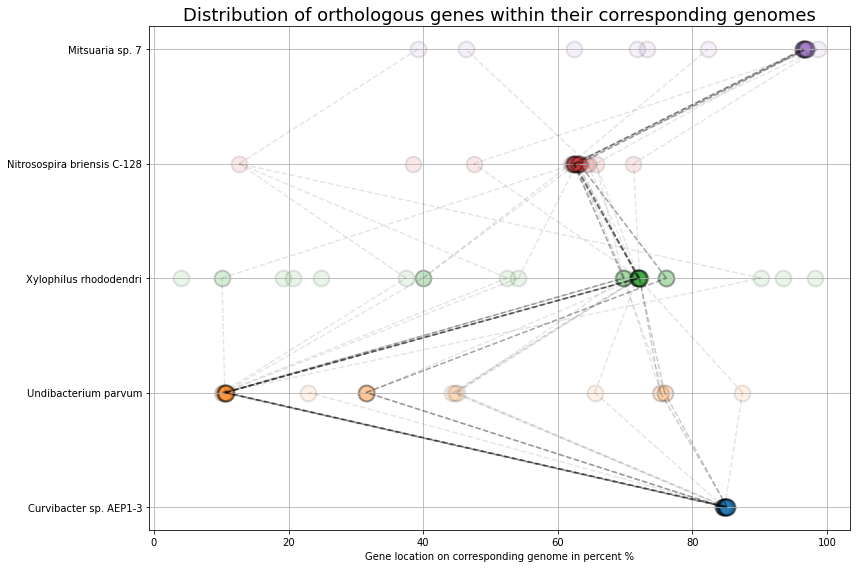

In [31]:
fig = plt.figure(figsize=(12,8))

counter = 0
for index,datapoints in enumerate(x_data_general):
    counter += 1
    x_data = datapoints
    y_data = [counter for datapoint in x_data]
    ax = plt.scatter(y=y_data,x=x_data,s=250,alpha=0.1,edgecolors = "black",linewidths=2)
    
    if index < len(x_data_general)-1:
        y_data_orthologs_plot = []
        for index_1,orth in enumerate(x_data_orthologs[counter-1]):
            for index_2,orth_hit in enumerate(x_data_orthologs[counter]):
                if orth == orth_hit:
                    #print(x_data_general[0][index_1])
                    y_data_orthologs_plot.append((x_data_general[counter-1][index_1],x_data_general[counter][index_2]))
        for data in y_data_orthologs_plot:
            plt.plot(data,[counter,counter+1],linestyle="dashed",c="black",alpha=0.1)

#plt.xlim(0,100)
#plt.xticks(np.arange(0,100,1),rotation=90)
plt.grid()
plt.yticks(range(1,len(y_tick_labels)+1),y_tick_labels)
plt.title("Distribution of orthologous genes within their corresponding genomes", fontsize=18)
plt.xlabel("Gene location on corresponding genome in percent %")
plt.tight_layout()
plt.savefig("gene_locations.png",dpi=600)
plt.show()

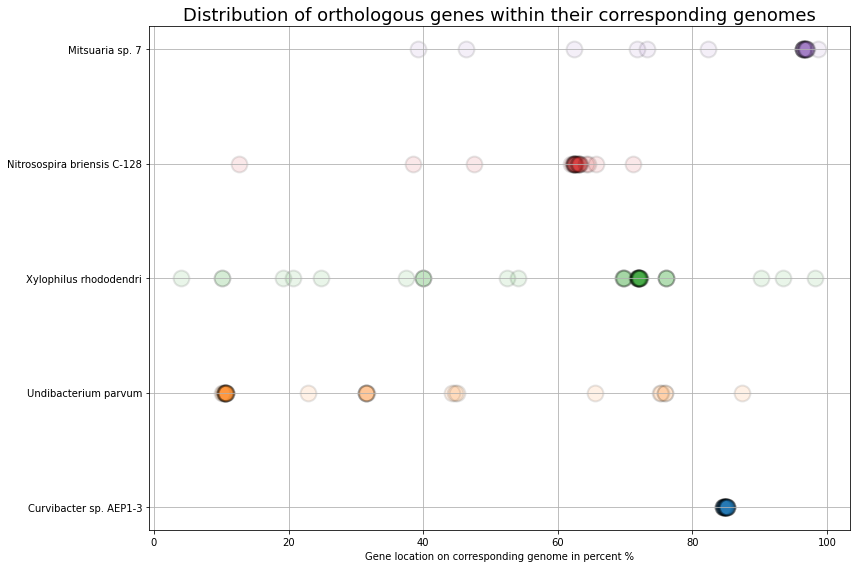

In [32]:
fig = plt.figure(figsize=(12,8))

counter = 0
for index,datapoints in enumerate(x_data_general):
    counter += 1
    x_data = datapoints
    y_data = [counter for datapoint in x_data]
    ax = plt.scatter(y=y_data,x=x_data,s=250,alpha=0.1,edgecolors = "black",linewidths=2)

#plt.xlim(0,100)
#plt.xticks(np.arange(0,100,1),rotation=90)
plt.grid()
plt.yticks(range(1,len(y_tick_labels)+1),y_tick_labels)
plt.title("Distribution of orthologous genes within their corresponding genomes", fontsize=18)
plt.xlabel("Gene location on corresponding genome in percent %")
plt.tight_layout()
#plt.savefig("gene_locations.png",dpi=600)
plt.show()

In [33]:
x_data_general[-1]

[39.20863309352518,
 46.32714880726997,
 62.41953805376751,
 71.7152593714502,
 73.1919727375994,
 82.26050738356683,
 96.40287769784173,
 96.42180992048466,
 96.44074214312761,
 96.45967436577054,
 96.47860658841348,
 96.49753881105642,
 96.55433547898524,
 96.63006436955699,
 96.66792881484287,
 96.74365770541462,
 96.7815221507005,
 96.85725104127225,
 96.87618326391518,
 96.89511548655813,
 96.91404770920106,
 97.00870882241576,
 98.6179477470655]